# Trabalho 1 - Redes Neurais

### Feito por: Giovanna Oliveira Martins, João Pedro Ferreira Pereira e Maria Luísa Gabriel Domingues

# Pré Processamento

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('kdd_train.csv')

In [ ]:
df.info

<bound method DataFrame.info of         duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                  25   
1                    0       0    0  ...                   1   
2                    0       0    0  ...                  26   
3                    0       0    0  ...                 255   
4                    0       0    0  ...                 255   
...                ...     ...  ...  ...                 ...   
125968               0       0    0  ...                  25   
125969               0       0    0  ...                 244   
125970               0       0    0  ...                  30   
125971               0       0    0  ...                   8   
125972               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         0.17                    0.03   
1                         0.00                    0.60   
2                         0.10                    0.05   
3                         1.00                    0.00   
4                         1.00                    0.00   
...                        ...                     ...   
125968                    0.10                    0.06   
125969                    0.96                    0.01   
125970                    0.12                    0.06   
125971                    0.03                    0.05   
125972                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.17                         0.00   
1                              0.88                         0.00   
2                              0.00                         0.00   
3                              0.03                         0.04   
4                              0.00                         0.00   
...                             ...                          ...   
125968                         0.00                         0.00   
125969                         0.01                         0.00   
125970                         0.00                         0.00   
125971                         0.00                         0.00   
125972                         0.30                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.05   
1                       0.00                      0.00                  0.00   
2                       1.00                      1.00                  0.00   
3                       0.03                      0.01                  0.00   
4                       0.00                      0.00                  0.00   
...                      ...                       ...                   ...   
125968                  1.00                      1.00                  0.00   
125969                  0.00                      0.00                  0.00   
125970                  0.72            

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [ ]:
colunas_para_remover = ['protocol_type', 'service', 'flag']
df = df.drop(colunas_para_remover, axis=1, errors='ignore')

In [ ]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [ ]:
attack_dict = {
    'normal': 'normal',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

df['labels'] = df['labels'].map(attack_dict)

In [ ]:
l1 = []
count = 0

for item in df['labels']:
    if item not in l1:
        count += 1
        l1.append(item)

print("No of unique items are:", count)
print(l1)

No of unique items are: 5
['normal', 'DoS', 'R2L', 'Probe', 'U2R']


In [ ]:
X = df.drop('labels', axis=1) # Features
y = df['labels'] # Target

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.11024922, -0.0076786 , -0.00491864, ..., -0.6248708 ,
        -0.22453241, -0.37638703],
       [-0.11024922, -0.00773737, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ..., -0.6248708 ,
        -0.35501418, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00773652, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train.size

88181

In [ ]:
y_test.size

37792

# Variando Taxa de Aprendizado

## Rede

In [ ]:
from sklearn.neural_network import MLPClassifier

learningRates = [0.001, 0.005, 0.01, 0.05, 0.1]
mlps = []

for lr in learningRates:
  mlps.append(MLPClassifier(hidden_layer_sizes=(11, 11), # Duas camadas ocultas de 11 nós
                    activation='logistic', # Função sigmóide (logistic)
                    solver='adam', # Otimizador adam (escolha padrão)
                    max_iter=100, # Número máximo de épocas (conforme o artigo)
                    random_state=42, # Para inicialização dos pesos
                    learning_rate_init=lr, # Variando taxa de aprendizado inicial
                    tol=1e-6) # Erro quadrático médio para parada (conforme o artigo)
                    )

for mlp in mlps:
  mlp.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Avaliação

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_preds = []

for mlp in mlps:
  y_pred = mlp.predict(X_test)
  y_preds.append(y_pred)

Acurácia do modelo MLP2 com taxa de aprendizado 0.001: 0.9895215918712955
Acurácia do modelo MLP2 com taxa de aprendizado 0.005: 0.9914267569856055
Acurácia do modelo MLP2 com taxa de aprendizado 0.01: 0.9916384419983065
Acurácia do modelo MLP2 com taxa de aprendizado 0.05: 0.9874047417442845
Acurácia do modelo MLP2 com taxa de aprendizado 0.1: 0.9846792972057579


Text(0.5, 0, 'Taxa de Aprendizado')

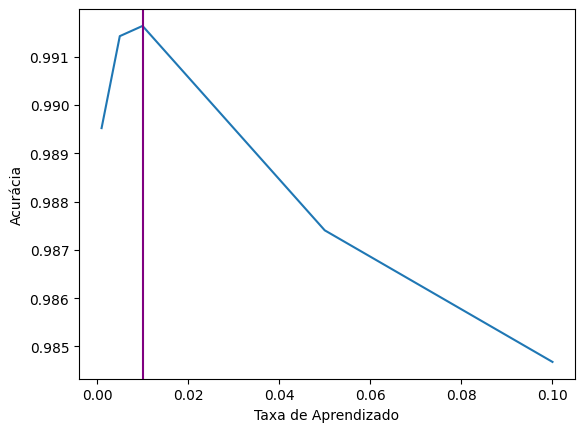

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracies = []
for y_pred in y_preds:
  accuracies.append(accuracy_score(y_test, y_pred))

for accuracy, lr in zip(accuracies,learningRates):
  print(f"Acurácia do modelo MLP2 com taxa de aprendizado {lr}: {accuracy}")

plt.plot(learningRates, accuracies)
plt.axvline(0.01, color="purple")
plt.ylabel("Acurácia")
plt.xlabel("Taxa de Aprendizado")

In [ ]:
from sklearn.metrics import confusion_matrix

classes = ['DoS', 'U2R', 'R2L', 'Probe', 'Normal']

cms = []

f1scrs = []

for y_pred in y_preds:
  cms.append(confusion_matrix(y_test, y_pred))
  f1scrs.append(f1_score(y_test, y_pred, average=None))

i = 0
for cm, lr in zip(cms,learningRates):
  print(f"F1-Score do MLP2 com taxa de aprendizado {lr}:\n {f1scrs[i]}\n")
  print(f"Matriz de Confusão com taxa de aprendizado {lr}\n {cm}\n")
  i+=1

F1-Score do MLP2 com taxa de aprendizado 0.001:
 [0.99527604 0.97656473 0.84552846 0.27272727 0.99040231]

Matriz de Confusão com taxa de aprendizado 0.001
 [[13800     1     1     0    23]
 [    3  3417     0     0   120]
 [    1     1   260     0    65]
 [    2     0     1     3    11]
 [  100    39    26     2 19916]]

F1-Score do MLP2 com taxa de aprendizado 0.005:
 [0.99596105 0.98004246 0.89490446 0.48275862 0.99217582]

Matriz de Confusão com taxa de aprendizado 0.005
 [[13809     4     0     0    12]
 [    0  3462     0     0    78]
 [    0     4   281     1    41]
 [    0     1     0     7     9]
 [   96    54    20     4 19909]]

F1-Score do MLP2 com taxa de aprendizado 0.01:
 [0.99592426 0.98001417 0.90232558 0.6        0.99244935]

Matriz de Confusão com taxa de aprendizado 0.01
 [[13806     7     2     0    10]
 [    2  3457     0     0    81]
 [    0     1   291     0    35]
 [    0     1     0     9     7]
 [   92    49    25     4 19913]]

F1-Score do MLP2 com taxa de a

In [ ]:
import pandas as pd

for cm, f1scr in zip(cms,f1scrs):
    df_f1scr = pd.DataFrame(f1scr, index=classes, columns=["Accuracy"])
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    print(df_f1scr)
    print()
    print(df_cm)
    print()

        Accuracy
DoS     0.995276
U2R     0.976565
R2L     0.845528
Probe   0.272727
Normal  0.990402

          DoS   U2R  R2L  Probe  Normal
DoS     13800     1    1      0      23
U2R         3  3417    0      0     120
R2L         1     1  260      0      65
Probe       2     0    1      3      11
Normal    100    39   26      2   19916

        Accuracy
DoS     0.995961
U2R     0.980042
R2L     0.894904
Probe   0.482759
Normal  0.992176

          DoS   U2R  R2L  Probe  Normal
DoS     13809     4    0      0      12
U2R         0  3462    0      0      78
R2L         0     4  281      1      41
Probe       0     1    0      7       9
Normal     96    54   20      4   19909

        Accuracy
DoS     0.995924
U2R     0.980014
R2L     0.902326
Probe   0.600000
Normal  0.992449

          DoS   U2R  R2L  Probe  Normal
DoS     13806     7    2      0      10
U2R         2  3457    0      0      81
R2L         0     1  291      0      35
Probe       0     1    0      9       7
Normal   

# Variando Função de Ativação
Fixando learning rate = 0,01

## Rede

In [ ]:
mlps_func_ativacao = []
func_ativacao = ['identity', 'tanh', 'relu', 'logistic']

for f in func_ativacao:
    mlps_func_ativacao.append(MLPClassifier(hidden_layer_sizes = (11, 11), # Duas camadas ocultas de 11 nós
                    activation=f, # Variando a função de ativação
                    solver='adam', # Otimizador adam (escolha padrão)
                    max_iter=100, # Número máximo de épocas (conforme o artigo)
                    random_state=42, # Para inicialização dos pesos
                    learning_rate_init=0.01, # Taxa de aprendizado inicial
                    tol=1e-6) # Erro quadrático médio para parada (conforme o artigo)
                    )

In [ ]:
for mlp_fa in mlps_func_ativacao:
    mlp_fa.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Avaliação

In [ ]:
acuracia_fa = []
cm_fa = []

for mlp_fa in mlps_func_ativacao:
    y_pred_fa = mlp_fa.predict(X_test)
    acuracia_fa.append(accuracy_score(y_test, y_pred_fa))
    cm_fa.append(confusion_matrix(y_test, y_pred_fa))


In [ ]:
classes = ['DoS', 'U2R', 'R2L', 'Probe', 'Normal']

for i in range(len(mlps_func_ativacao)):
    print(f"Acurácia do modelo MLP2 com a função de ativação {func_ativacao[i]}: {acuracia_fa[i]}")
    print(f"Matriz de Confusão com a função de ativação {func_ativacao[i]}:\n")
    print(pd.DataFrame(cm_fa[i], index=classes, columns=classes))
    print()

Acurácia do modelo MLP2 com a função de ativação identity: 0.9467347586790855
Matriz de Confusão com a função de ativação identity:

          DoS   U2R  R2L  Probe  Normal
DoS     13596    26    0      0     203
U2R       107  2905    1      0     527
R2L         7     1  218      0     101
Probe       0     0    4      2      11
Normal    221   608  196      0   19058

Acurácia do modelo MLP2 com a função de ativação tanh: 0.9906064775613886
Matriz de Confusão com a função de ativação tanh:

          DoS   U2R  R2L  Probe  Normal
DoS     13795     2    1      0      27
U2R         0  3439    0      0     101
R2L         0     0  281      1      45
Probe       0     0    0      3      14
Normal     91    45   26      2   19919

Acurácia do modelo MLP2 com a função de ativação relu: 0.9911356900931414
Matriz de Confusão com a função de ativação relu:

          DoS   U2R  R2L  Probe  Normal
DoS     13799     2    2      0      22
U2R         2  3429    0      0     109
R2L         0  

# Variando o Número de Neurônios nas Camadas Escondidas
Fixando learning rate = 0,01 e função de ativação = sigmoid

## Rede

In [ ]:
mlps_num_neuronios = []
num_neuronios = [(8, 8), (16, 8), (16, 16), (32, 16), (32, 32), (64, 32), (64, 64)]

for n in num_neuronios:
    mlps_num_neuronios.append(MLPClassifier(hidden_layer_sizes = n, # Variando o número de neurônios nas camadas escondidas
                    activation='logistic', # Função sigmóide (conforme o artigo)
                    solver='adam', # Otimizador adam (escolha padrão)
                    max_iter=100, # Número máximo de épocas (conforme o artigo)
                    random_state=42, # Para inicialização dos pesos
                    learning_rate_init=0.01, # Taxa de aprendizado inicial
                    tol=1e-6) # Erro quadrático médio para parada (conforme o artigo)
                    )

In [ ]:
for mlp_nn in mlps_num_neuronios:
    mlp_nn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Avaliação

In [ ]:
acuracia_num_neuronios = []
cm_num_neuronios = []
f1scrs_n = []

for mlp_nn in mlps_num_neuronios:
    y_pred_nn = mlp_nn.predict(X_test)
    acuracia_num_neuronios.append(accuracy_score(y_test, y_pred_nn))
    cm_num_neuronios.append(confusion_matrix(y_test, y_pred_nn))
    f1scrs_n.append(f1_score(y_test, y_pred_nn, average=None))


In [ ]:
classes = ['DoS', 'U2R', 'R2L', 'Probe', 'Normal']

for i in range(len(mlps_num_neuronios)):
    print(f"Acurácia do modelo MLP2 com configuração {num_neuronios[i]}: {acuracia_num_neuronios[i]}")
    #linha é o dado real, coluna é o dado predito
    print(f"F1-Score do modelo com configuração {num_neuronios[i]}:\n")
    print(pd.DataFrame(f1scrs_n[i], index=classes, columns=["Accuracy"]),"\n")
    print(f"Matriz de Confusão com configuração {num_neuronios[i]}:\n")
    print(pd.DataFrame(cm_num_neuronios[i], index=classes, columns=classes))
    print()


Acurácia do modelo MLP2 com configuração (8, 8): 0.9879604149026249
F1-Score do modelo com configuração (8, 8):

        Accuracy
DoS     0.994238
U2R     0.970855
R2L     0.858491
Probe   0.333333
Normal  0.989073 

Matriz de Confusão com configuração (8, 8):

          DoS   U2R  R2L  Probe  Normal
DoS     13805     4    1      0      15
U2R         7  3431    0      0     102
R2L         0     2  273      1      51
Probe       1     1    0      4      11
Normal    132    90   35      2   19824

Acurácia do modelo MLP2 com configuração (16, 8): 0.9917972057578324
F1-Score do modelo com configuração (16, 8):

        Accuracy
DoS     0.995740
U2R     0.981772
R2L     0.908810
Probe   0.400000
Normal  0.992550 

Matriz de Confusão com configuração (16, 8):

          DoS   U2R  R2L  Probe  Normal
DoS     13792     5    0      1      27
U2R         2  3474    0      0      64
R2L         0     2  294      0      31
Probe       0     1    0      5      11
Normal     83    55   26      2 

# Experimentos Adicionando uma Terceira Camada Oculta
Fixando learning rate = 0,01, função de ativação = sigmoid, camada 1 = 32 e camada 2 = 16

## Rede

In [ ]:
camadas = [(32,16,8), (32,16,11), (32,16,16)]
mlp3s = []

for c in camadas:
  mlp3s.append(MLPClassifier(hidden_layer_sizes=c,# Variando o número de neurônios na camada escondida adicionada
                    activation='logistic', # Função sigmóide (conforme o artigo)
                    solver='adam', # Otimizador adam (escolha padrão)
                    max_iter=100, # Número máximo de épocas (conforme o artigo)
                    random_state=42, # Para inicialização dos pesos
                    learning_rate_init=0.01, # Taxa de aprendizado inicial
                    tol=1e-6) # Erro quadrático médio para parada (conforme o artigo)
  )
for mlp3 in mlp3s:
  mlp3.fit(X_train, y_train)

## Avaliação

In [ ]:
acuracias_mlp3 = []
cms_mlp3 = []

for mlp3 in mlp3s:
  pred = mlp3.predict(X_test)
  acuracias_mlp3.append(accuracy_score(y_test, pred))
  cms_mlp3.append(confusion_matrix(y_test, pred))

for i in range(len(mlp3s)):
    print(f"Acurácia do modelo MLP3: {acuracias_mlp3[i]}")
    print(f"Matriz de Confusão:\n")
    print(pd.DataFrame(cms_mlp3[i], index=classes, columns=classes))
    print()


Acurácia do modelo MLP3: 0.9911886113463166
Matriz de Confusão:

          DoS   U2R  R2L  Probe  Normal
DoS     13792     3    1      0      29
U2R         0  3462    0      0      78
R2L         0     0  278      0      49
Probe       0     1    1      5      10
Normal     81    44   33      3   19922

Acurácia do modelo MLP3: 0.9922205757832345
Matriz de Confusão:

          DoS   U2R  R2L  Probe  Normal
DoS     13807     4    0      0      14
U2R         1  3478    0      0      61
R2L         0     2  294      0      31
Probe       0     1    0      7       9
Normal     93    41   30      7   19912

Acurácia do modelo MLP3: 0.9927762489415749
Matriz de Confusão:

          DoS   U2R  R2L  Probe  Normal
DoS     13804     1    0      0      20
U2R         1  3453    0      0      86
R2L         0     1  296      0      30
Probe       0     0    0      6      11
Normal     72    22   27      2   19960



# Função para Calcular F1-Score das Redes Escolhidas

(com base em cada experimento)

In [ ]:
import numpy as np

def calcular_f1(conf_matrix):
    conf_matrix = np.array(conf_matrix)
    num_classes = 5

    f1_scores = []

    for i in range(num_classes):
        tp = conf_matrix[i, i]
        fp = sum(conf_matrix[:, i]) - tp
        fn = sum(conf_matrix[i, :]) - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        f1_scores.append(f1)

    return f1_scores

### MLP2 do Artigo

In [ ]:
classes = ['DoS', 'U2R', 'R2L', 'Probe', 'Normal']

conf_matrix_mlp2 = [
    [13643,     27,    44,      0,      23],
    [27,  3363,    4,      0,      138],
    [0,     3,  120,      0,      167],
    [0,     0,    0,      0,      12],
    [231,    102,   46,      0,   19843]
]

f1_scores_mlp2 = calcular_f1(conf_matrix_mlp2)

for i in range(len(classes)):
    print(f"F1-score para classe {classes[i]}: {f1_scores_mlp2[i]}\n")

F1-score para classe DoS: 0.9872639120052102

F1-score para classe U2R: 0.9571652198662302

F1-score para classe R2L: 0.47619047619047616

F1-score para classe Probe: 0

F1-score para classe Normal: 0.98220517262715



### MLP (11, 11) com Taxa de Aprendizado = 0.01 e Função de Ativação = Sigmóide

In [ ]:
conf_matrix_ta = [
    [13806,     7,     2,     0,    10],
    [    2,  3457,     0,     0,    81],
    [    0,     1,   291,     0,    35],
    [    0,     1,     0,     9,     7],
    [   92,    49,    25,     4, 19913]
]

f1_scores_ta = calcular_f1(conf_matrix_ta)

for i in range(len(classes)):
    print(f"F1-score para classe {classes[i]}: {f1_scores_ta[i]}\n")

F1-score para classe DoS: 0.9959242560865644

F1-score para classe U2R: 0.9800141743444365

F1-score para classe R2L: 0.9023255813953488

F1-score para classe Probe: 0.5999999999999999

F1-score para classe Normal: 0.9924493508435296



### MLP (32, 16)

In [ ]:
conf_matrix_nn = [
    [13803, 5, 0, 0, 17],
    [0,  3468,    0,      0,      72],
    [0,     1,  295,      0,      31],
    [0,     1,    0,      5,      11],
    [85,    43,   22,      3,   19930]
]

f1_scores_nn = calcular_f1(conf_matrix_nn)

for i in range(len(classes)):
    print(f"F1-score para classe {classes[i]}: {f1_scores_nn[i]}\n")

F1-score para classe DoS: 0.9961389961389961

F1-score para classe U2R: 0.982714650042505

F1-score para classe R2L: 0.9161490683229814

F1-score para classe Probe: 0.4

F1-score para classe Normal: 0.9929254683140694



### MLP (32, 16, 16)

In [ ]:
conf_matrix_nc = [
    [13804,     1,    0,      0,      20],
    [1,  3453,    0,      0,      86],
    [0,     1,  296,      0,      30],
    [0,     0,    0,      6,      11],
    [72,    22,   27,      2,   19960]
]

f1_scores_nc = calcular_f1(conf_matrix_nc)

for i in range(len(classes)):
    print(f"F1-score para classe {classes[i]}: {f1_scores_nc[i]}\n")

F1-score para classe DoS: 0.9966067431954372

F1-score para classe U2R: 0.9841812740487389

F1-score para classe R2L: 0.9107692307692308

F1-score para classe Probe: 0.48

F1-score para classe Normal: 0.9932819109231152

